<a href="https://colab.research.google.com/github/BhavneetSaini/NeuralNetworkPractical/blob/main/GeneticAlgorithimpdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Generation 1 , Best Fitness : 3.2384
 Generation 10 , Best Fitness : 4.3003
 Generation 20 , Best Fitness : 4.3003
 Generation 30 , Best Fitness : 4.5208
 Generation 40 , Best Fitness : 4.7885
 Generation 50 , Best Fitness : 4.7885
 Generation 60 , Best Fitness : 4.8003
 Generation 70 , Best Fitness : 4.8003
 Generation 80 , Best Fitness : 4.8003
 Generation 90 , Best Fitness : 4.8003
 Generation 100 , Best Fitness : 4.8003


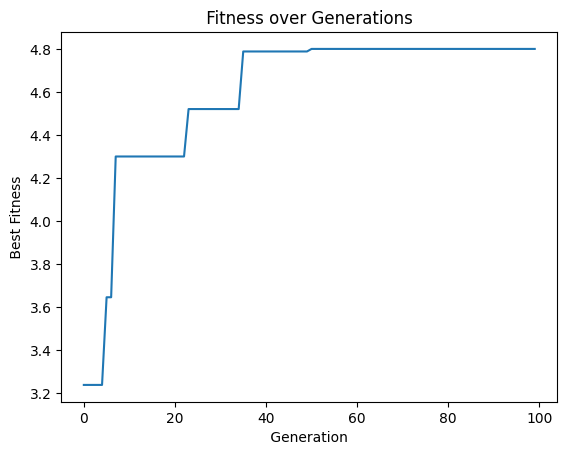

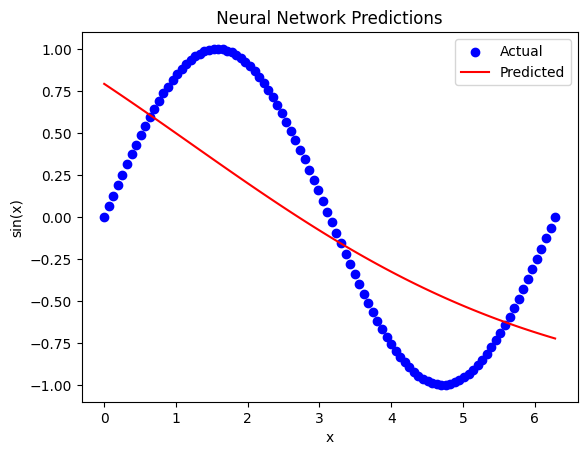

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Generate input data : 100 points between 0 and 2
x = np . linspace (0 , 2 * np . pi , 100)

# Compute corresponding sine values
y = np . sin ( x )

# Define the neural network architecture
input_size = 1 # One input neuron
hidden_size = 5 # Number of neurons in the hidden layer
output_size = 1 # One output neuron

# Total weights and biases
total_weights = ( input_size * hidden_size ) + hidden_size + ( hidden_size * output_size ) + output_size

#defining Activation function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )


def neural_network ( weights , x ) :
  # Extract weights and biases from the chromosome
  # Input - Hidden weights
  idx = 0
  W1 = weights [ idx : idx + input_size * hidden_size ]. reshape (( input_size , hidden_size ) )
  idx += input_size * hidden_size

  # Hidden biases
  b1 = weights [ idx : idx + hidden_size ]. reshape (( hidden_size ,) )
  idx += hidden_size

  # Hidden - Output weights
  W2 = weights [ idx : idx + hidden_size * output_size ]. reshape (( hidden_size , output_size ) )
  idx += hidden_size * output_size

  # Output bias
  b2 = weights [ idx : idx + output_size ]. reshape (( output_size ,) )

  # Forward pass
  # Hidden layer computation
  z1 = np . dot (x , W1 ) + b1
  a1 = sigmoid ( z1 )

  # Output layer computation
  z2 = np . dot ( a1 , W2 ) + b2
  output = z2 # Linear activation for regression

  return output

#definig fitness function
def fitness_function ( weights ) :
  # Predict output using the neural network
  predictions = neural_network ( weights , x . reshape ( -1 , 1) )

  # Compute mean squared error (MSE) between predictions and actual values
  mse = np . mean (( predictions . flatten () - y ) ** 2)

  # Fitness is inverse of MSE (we minimize MSE , so maximizing fitness )
  fitness = 1 / (mse + 1e-6) # Add small value to prevent division by zero

  return fitness

#defining intial population
def initialize_population ( pop_size , chromosome_length ) :
  # Create a population with random weights between -1 and 1
  population = np . random . uniform ( -1 , 1 , ( pop_size , chromosome_length ) )
  return population

  #selecton function
def selection ( population , fitness_scores ) :
  # Roulette Wheel Selection
  fitness_sum = np . sum( fitness_scores )
  selection_probs = fitness_scores / fitness_sum
  selected_index = np . random . choice (len ( population ) , p = selection_probs )
  return population [ selected_index ]

 #crossover function
def crossover ( parent1 , parent2 , crossover_rate =0.7) :
  child = np . copy ( parent1 )
  if np . random . rand () < crossover_rate :
      # Single - point crossover
      crossover_point = np . random . randint (1 , len( parent1 ) - 1)
      child [ crossover_point :] = parent2 [ crossover_point :]
  return child

  #mutation function

def mutate ( chromosome , mutation_rate =0.1) :
    for i in range (len( chromosome ) ) :
          if np . random . rand () < mutation_rate :
              # Random mutation between -1 and 1
              chromosome [ i ] = np . random . uniform ( -1 , 1)
    return chromosome

 # Genetic Algorithm parameters
population_size = 50
generations = 100
crossover_rate = 0.7
mutation_rate = 0.1


# Initialize population
population = initialize_population ( population_size , total_weights )

 # Keep track of the best solution
best_fitness = 0
best_weights = None
fitness_history = []

 # GA main loop
for generation in range ( generations ) :
    # Compute fitness for each individual
    fitness_scores = np . array ([ fitness_function ( individual ) for individual in population ])

    # Record best fitness
    max_fitness_idx = np . argmax ( fitness_scores )
    if fitness_scores [ max_fitness_idx ] > best_fitness :
        best_fitness = fitness_scores [ max_fitness_idx ]
        best_weights = population [ max_fitness_idx ]

    fitness_history . append ( best_fitness )

    # Create new population
    new_population = []
    for _ in range ( population_size ) :
        # Selection
        parent1 = selection ( population , fitness_scores )
        parent2 = selection ( population , fitness_scores )

        # Crossover
        child = crossover ( parent1 , parent2 , crossover_rate )

        # Mutation
        child = mutate ( child , mutation_rate )

        new_population . append ( child )

    population = np . array ( new_population )

    # Optional : Print progress
    if ( generation + 1) % 10 == 0 or generation == 0:
        print ( f" Generation { generation + 1} , Best Fitness : { best_fitness :.4f}")

# Plot fitness over generations
plt . plot ( fitness_history )
plt . title (" Fitness over Generations ")
plt . xlabel (" Generation ")
plt . ylabel (" Best Fitness ")
plt . show ()



# Use the best weights to make predictions
predictions = neural_network ( best_weights , x . reshape ( -1 , 1) )

# Plot the results
plt . scatter (x , y , label ='Actual' , color = 'blue')
plt . plot (x , predictions . flatten () , label = 'Predicted' , color = 'red' )
plt . title (" Neural Network Predictions ")
plt . xlabel ("x")
plt . ylabel ("sin(x)")
plt . legend ()
plt . show ()



